# Google Play Store 

# Complete EDA analysis for bigginers to advance EDA

In [2]:
# 1. importing  libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data load and exploration cleaning
* load the data


In [3]:
df = pd.read_csv('googleplaystore.csv')

- Lets have a look on top 5 rows

In [ ]:
df.head(5)

. importing things to know

In [5]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Hide all wornings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.columns

In [ ]:
print(f'The number of rows are {df.shape[0]}, and the number of columns are {df.shape[1]}')

In [ ]:
print(f'The names of columns in this dataset are as follows: {df.columns}')

In [ ]:
df.info()

In [ ]:
df.describe()

In [12]:
# how to make size of numaric columns 

In [ ]:
df['Size'].value_counts()

# Observation:
1. 'varies with device' 
2. 'M'
3. 'k'

In [ ]:
df['Size'].isnull().sum()

- No missing values in size , we are good to go

Varify the number of values and 3 different kinds of values

In [ ]:
# Find the values having 'M' in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()


In [ ]:
# Find the values having 'k' in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

In [ ]:
# Find the values having 'varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

In [ ]:
8830+316+1695

In [19]:
# Convert the whole column into biytes
# Lets define a function to convert the values into bytes
def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float (size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
            return size            
                


In [ ]:
df['Size']

In [21]:
# Lets apply the function
df['Size'] = df['Size'].apply(convert_size)

In [ ]:
df['Size']

In [23]:
# rename the column
df.rename(columns={'Size':'Size_in_bytes'}, inplace=True)

In [ ]:
df.head(5)

In [25]:
df['Size_in_Mbs'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [ ]:
df['Size_in_Kbs'] = df['Size_in_bytes'].apply(lambda x: x/(1024))
df.head(5)

# Lets take care of installs

In [ ]:
df['Installs'].unique()

In [ ]:
df['Installs'].value_counts()

In [ ]:
df['Installs'].isnull().sum()

# Installs
# 1. remove + sign
# 2. remove ,
# 3. convert column into an  integer

In [30]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [ ]:
df['Installs'].value_counts()

In [32]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [ ]:
df['Installs'].value_counts()

# To convert to int having two functions 

In [34]:
df['Installs'] = df['Installs'].astype(int)

In [35]:
df['Installs'] = df['Installs'].apply( lambda x: int(x))

In [ ]:
df['Installs'].value_counts()

In [ ]:
df.describe()

# Price Column

In [ ]:
df['Price'].value_counts()

In [ ]:
df['Price'].isnull().sum()

In [ ]:
df['Price'].unique()

In [ ]:
# lets see how many values have dollar sign 
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

In [ ]:
# this code counts the number of values in the 'price' column which contain 0 but does not contain '$' 
df['Price'].loc[df['Price'].str.contains('0') & ~df['Price'].str.contains('\$')].value_counts().sum()

In [43]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [ ]:
df['Price'].value_counts()

In [45]:
# now we will convert the column into numeric values
df['Price'] = df['Price'].apply( lambda x: float (x))

In [ ]:
df.describe()

In [ ]:
# using f string print min and max and average prices of the apps
print(f'The minimum price of the apps is {df["Price"].min()}')
print(f'The maximum price of the apps is {df["Price"].max()}')
print(f'The average price of the apps is {df["Price"].mean()}')

# Missing values 

In [50]:
# find missing values
df.isnull().sum().sum()

np.int64(6572)

<Axes: >

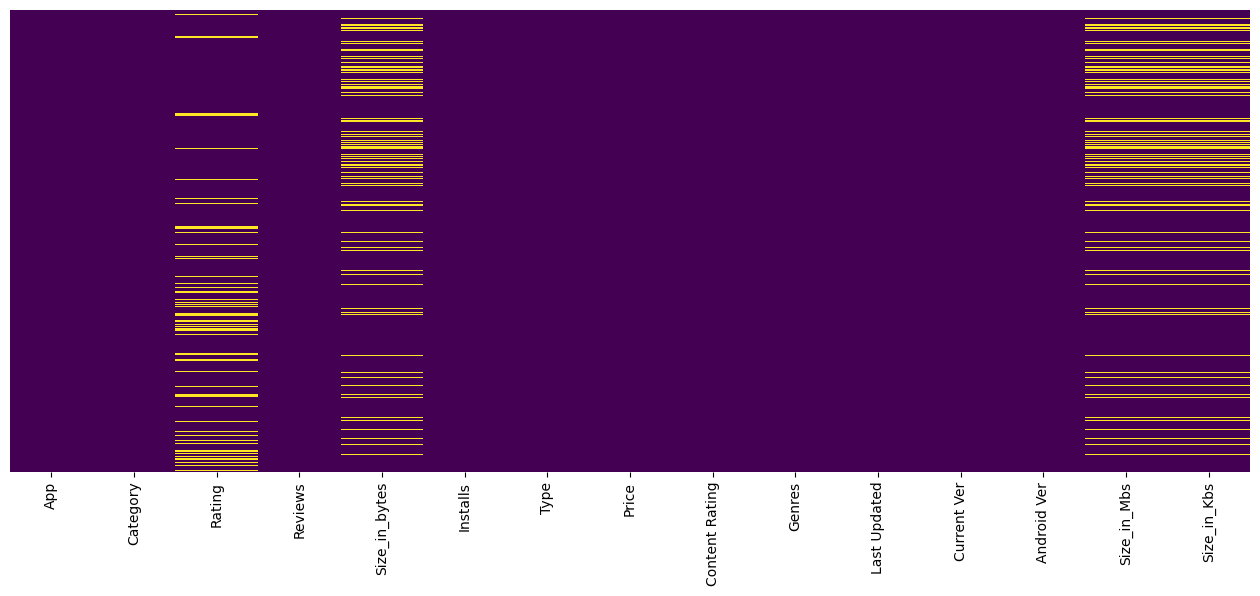

In [51]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

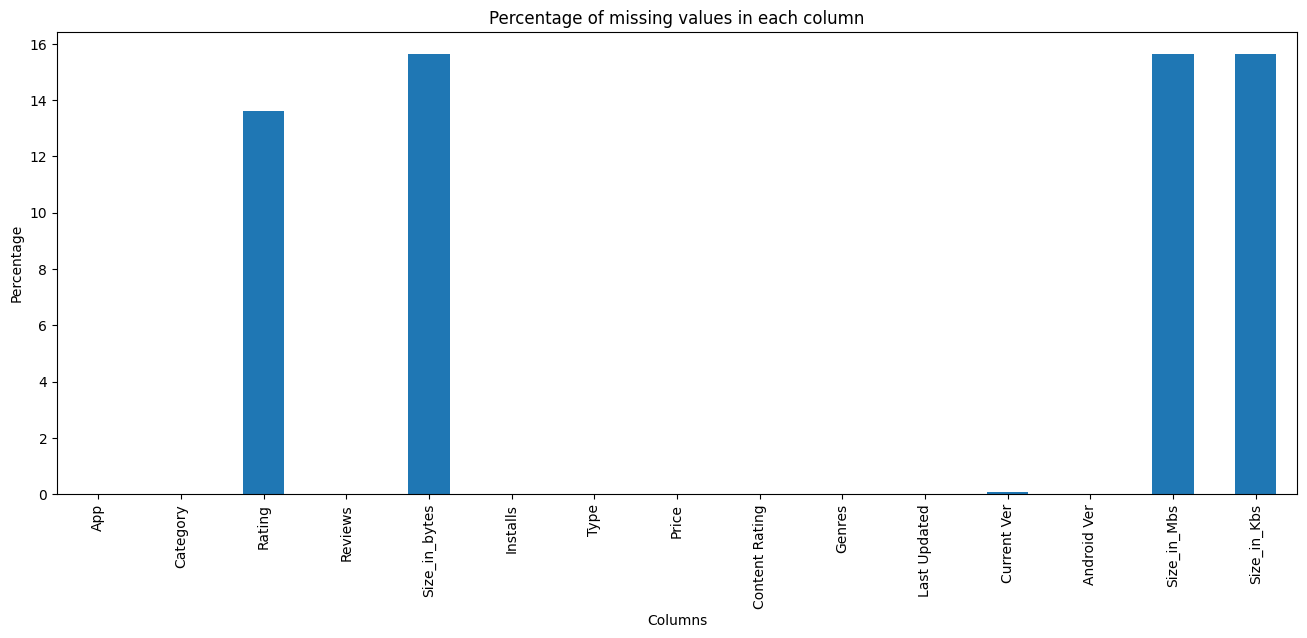

In [52]:
# make figure size
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

<Axes: >

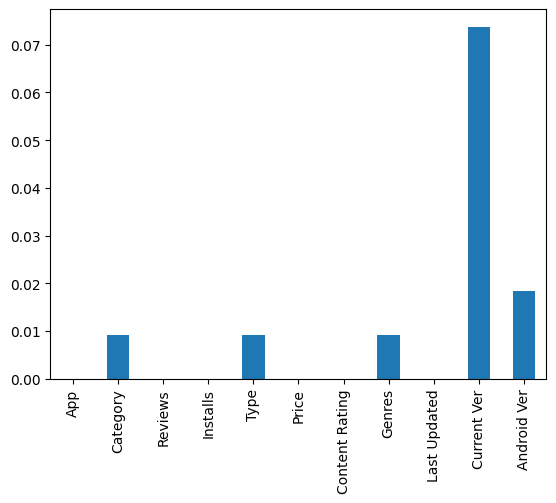

In [53]:
missing_percentage[missing_percentage < 1].plot(kind='bar')